# Import the  Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Read the Dataset


In [58]:
table=pd.read_csv("titanic_trainingset.csv")
table.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Relationship between passenger classes


<AxesSubplot:xlabel='Survived', ylabel='count'>

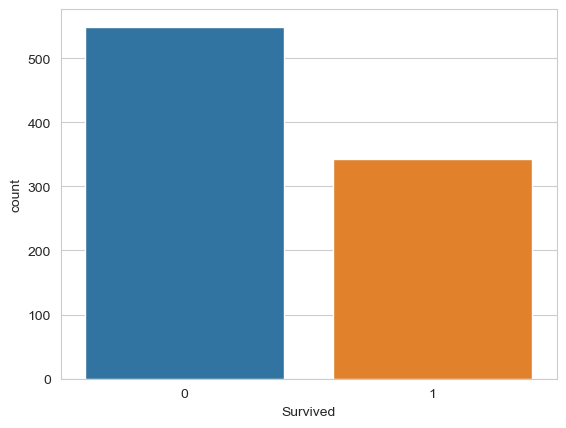

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=table)

# Relationship between Gender and Survival


<AxesSubplot:xlabel='Survived', ylabel='count'>

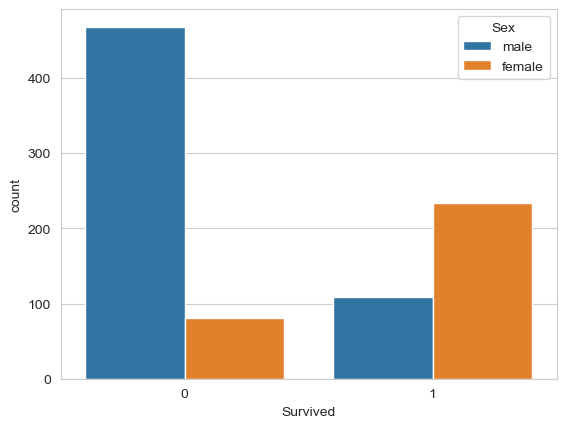

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=table)

C:\Users\deepak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

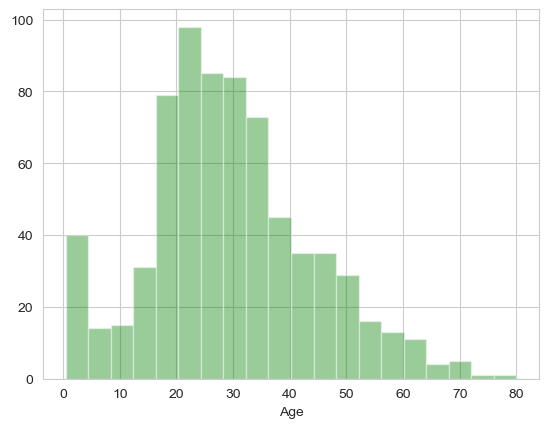

In [61]:
sns.distplot(table['Age'].dropna(),kde=False,bins=20,color='green')

# Data Cleaning


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

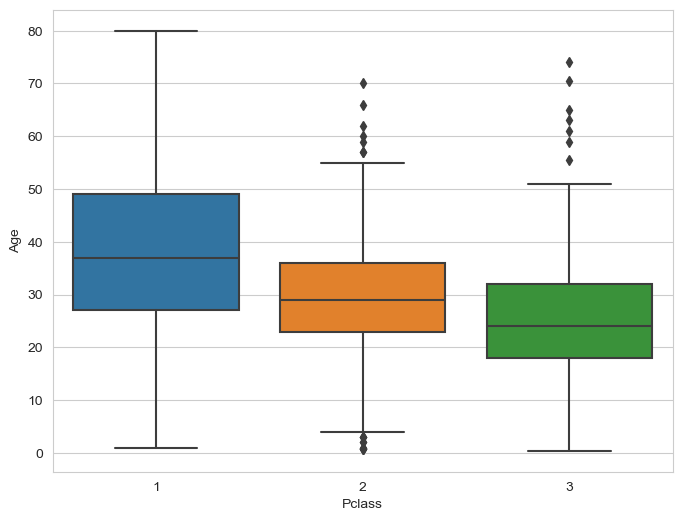

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=table)

# Replace the Nan values

In [63]:
def replace_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        
        if(Pclass==1):
            return 37
        
        if(Pclass==2):
            return 29
        
        if(Pclass==3):
            return 25
    else:
        return Age

In [64]:
table['Age']=table[['Age','Pclass']].apply(replace_age,axis=1)

In [65]:
table.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

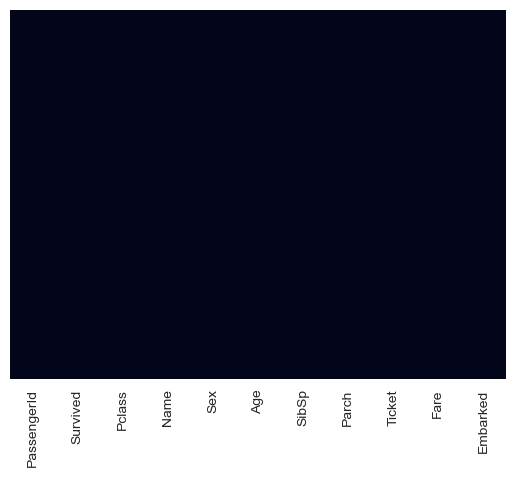

In [66]:
sns.heatmap(table.isnull(),yticklabels=False,cbar=False)

# Converting to Categorical Features

In [67]:
embark=pd.get_dummies(table['Embarked'],drop_first=True)
sex=pd.get_dummies(table['Sex'])

In [68]:
table.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)
table.head(10)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,25.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [70]:
table=pd.concat([table,sex,embark],axis=1)
table

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S,female,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,1,0,1,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,1,1,0,0,1
888,889,0,3,25.0,1,2,23.4500,1,0,0,1,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,0,0,0,1,0,0


# Logistic Regression Model

# Train Test Split

In [71]:
table.drop(['Survived'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S,female,male,Q,S
0,1,3,22.0,1,0,7.2500,0,1,0,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,1,0,1,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,1,0,0,1
888,889,3,25.0,1,2,23.4500,1,0,0,1,1,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,0,0,0,1,0,0


In [72]:
table['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(table.drop('Survived',axis=1),table['Survived'],random_state=101)

# Training and Prediction

In [103]:
test_data=pd.read_csv("titanic_test_data.csv")

In [104]:
 from sklearn.linear_model import LogisticRegression
    

In [ ]:
mod=LogisticRegression()
mod.fit(X_train,y_train)

In [107]:
prediction=mod.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [109]:
accuracy=confusion_matrix(y_test,prediction)
accuracy

array([[110,  17],
       [ 36,  60]], dtype=int64)

In [110]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.7623318385650224

In [111]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [ ]:
df=pd.DataFrame(test_data['PassengerId'])
df['Survived']=prediction
df.to_csv("prediction.csv",index=False)